**ANALYZING INDIAN STARTUP FUNDING TRENDS WITH CRISP-DM**

**Description:**

This project conducts an in-depth analysis of funding trends within the Indian startup ecosystem from 2018 to 2021 datasets, employing the CRISP-DM methodology. Leveraging comprehensive datasets on funding details, my goal is to identify patterns, fluctuations, and key insights into the funding landscape of Indian startups during these periods. By examining funding amounts, types, sectors, and geographical distributions, I aim to provide actionable recommendations for stakeholders navigating the dynamic funding environment.

**Hypothesis**

**Null Hypothesis (H₀)**

The funding landscape of Indian startups and its founded year are not significantly influenced by economic conditions, industry sector performance, and Location.

**Alternative Hypothesis (H₁)**

The funding landscape of Indian startups and its founded year are significantly influenced by economic conditions, industry sector performance, and Location.

**Primary Business Question:**

How have funding trends evolved in the Indian startup ecosystem from 2018 to 2021, and what insights can be derived to inform investment decisions, policy-making, and strategic planning for stakeholders?

**Sub-Questions:**

1. **Yearly Funding Trends:**

How did the total funding amounts received by startups change each year?

Were there any significant peaks or troughs in funding during this period, and what external factors (e.g., economic conditions) might have influenced these trends?

2. **Sector-Specific Funding Analysis:**

Which sectors received the most funding, and how did this distribution change over the years?

What characteristics make certain sectors more attractive to investors, and how have sector-specific trends impacted the overall funding landscape?

3. **Funding Stages and Evolution:**

What were the most common funding stages for Indian startups during this period?

How did the prevalence of different funding stages shift over time, and what does this indicate about the maturity and development of the Indian startup ecosystem?

4. **Geographical Distribution of Funding:**

How was funding distributed across various regions in India, and which regions emerged as major startup hubs?

What factors contributed to the rise of these startup hubs?

5. **Impact of External Factors:**

How did global economic trends, such as revenue growth, affect funding trends in the Indian startup ecosystem?


6. **Investor Behavior and Preferences:**

How did investor preferences evolve concerning sectors, funding stages, and geographic locations?



**CRISP-DM Strategy (One-Month Timeline)**

**Week 1: Business Understanding & Data Understanding**
**Objective:** Define project objectives, gather requirements, and understand the provided datasets.

**Tasks:**
1. Conduct meetings with team members to clarify project goals and expectations.
2. Perform initial exploration of the datasets to understand their structure and content.
3. Identify key variables and metrics of interest for analysis.

**Week 2: Data Preparation and Cleaning**
**Objective:** Clean and preprocess the datasets to ensure they are ready for analysis.

**Tasks:**
1. Address missing values, remove duplicates, and handle inconsistencies in the data.
2. Conduct exploratory data analysis (EDA) to uncover patterns and trends.

**Week 3: Modeling & Evaluation**
**Objective:** Statistical testing.

**Tasks:**
1. Convert categorical data to numeric by encoding.
2. Carry out statistical testing with ANOVA.

**Week 4: Deployment**
**Objective:** Present findings and provide actionable recommendations to stakeholders.

**Tasks:**
1. Create visualizations and reports to communicate insights effectively (PowerBI deployment).
2. Summarize key findings and implications for decision-making.
3. Present actionable recommendations based on the analysis.
4. Document the entire process, including methodologies, findings, and recommendations (Article).

## Business Understanding & Data Understanding

**Datasets Importation**

In [1]:
# Connect to the Database Using "pyodbc"
import pyodbc
print("pyodbc is installed and imported successfully")

import pyodbc
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials set in the '.env' file
server = environment_variables.get("SERVER_NAME")
database = environment_variables.get("DATABASE_NAME")
login = environment_variables.get("LOGIN")
password = environment_variables.get("PASSWORD")





pyodbc is installed and imported successfully


In [2]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [3]:
# connect to the Database
connection = pyodbc.connect(connection_string)
print("Connection successful")


Connection successful


In [4]:
# Query the Sql Database
query = "SELECT * FROM dbo.LP1_startup_funding2020"

# Execute the query and read the results into a DataFrame
data_1 = pd.read_sql(query, connection)


In [5]:
query = "SELECT * FROM dbo.LP1_startup_funding2021"

data_2 = pd.read_sql(query, connection)

In [6]:
# Load the CSV file into  DataFrame


df_data_3 = pd.read_csv('../CSV Files/startup_funding2018.csv')

df_data_4 = pd.read_csv('../CSV Files/startup_funding2019.csv')

**Initial Exploration**

In [7]:
# Inspect columns of each DataFrame
print("Columns in data_1:", data_1.columns)
print("Columns in data_2:", data_2.columns)
print("Columns in df_data_3:", df_data_3.columns)
print("Columns in df_data_4:", df_data_4.columns)


Columns in data_1: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')
Columns in data_2: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')
Columns in df_data_3: Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')
Columns in df_data_4: Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')


In [8]:
# Define a function to convert rupees to dollars
def rupees_to_dollars(amount, currency):
    if currency.lower() == 'rupees':
        return amount * 0.014  # Conversion rate from rupees to dollars
    else:
        return amount

In [9]:
# Standardize column names
df_data_3 = df_data_3.rename(columns={
    'Company Name': 'Company_Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Amount': 'Amount',
    'Location': 'HeadQuarter',
    'About Company': 'What_it_does'
})

df_data_4 = df_data_4.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
})

In [10]:
# Ensure all DataFrames have the same columns
common_columns = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage', 'column10']


**Merging the Four (4) DataFrames into a Single DataFrame**

In [11]:

# Check if 'column10' is present in data_1 and data_2
if 'column10' not in data_1.columns:
    data_1['column10'] = pd.NA
if 'column10' not in data_2.columns:
    data_2['column10'] = pd.NA

# Add missing columns to df_data_3
for column in common_columns:
    if column not in df_data_3.columns:
        df_data_3[column] = pd.NA

# Add missing columns to df_data_4
for column in common_columns:
    if column not in df_data_4.columns:
        df_data_4[column] = pd.NA

# Align columns in each DataFrame
data_1 = data_1[common_columns]
data_2 = data_2[common_columns]
df_data_3 = df_data_3[common_columns]
df_data_4 = df_data_4[common_columns]

# Apply the conversion function to the 'Amount' column in all DataFrames
data_1['Amount'] = data_1.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)
data_2['Amount'] = data_2.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)
df_data_3['Amount'] = df_data_3.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)
df_data_4['Amount'] = df_data_4.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)



# Concatenate the DataFrames
merged_data = pd.concat([data_1, data_2, df_data_3, df_data_4], ignore_index=True)




**Initial Exploration**


In [12]:
# Display the first few rows of the combined DataFrame
print("First 5 rows of the merged dataset:")

merged_data.head()


First 5 rows of the merged dataset:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [13]:
# Display the structure of the combined DataFrame
print("\nStructure of the merged dataset:")
merged_data.info()


Structure of the merged dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   column10       2 non-null      object 
dtypes: float64(1), object(9)
memory usage: 225.0+ KB


In [14]:
# Display the summary statistics for the 'Amount' column
print("\nSummary statistics for the 'Amount' column:")

merged_data['Amount'].describe()



Summary statistics for the 'Amount' column:


count     2622
unique     774
top          —
freq       148
Name: Amount, dtype: object

In [15]:

# Check for missing values
print("\nMissing values in each column:")

merged_data.isnull().sum()


Missing values in each column:


Company_Brand       0
Founded           769
HeadQuarter       114
Sector             18
What_it_does        0
Founders          545
Investor          626
Amount            257
Stage             938
column10         2877
dtype: int64

In [16]:
# Display the number of unique values in each column
print("\nNumber of unique values in each column:")

print(merged_data.nunique())


Number of unique values in each column:
Company_Brand    2214
Founded            34
HeadQuarter       172
Sector            873
What_it_does     2691
Founders         1980
Investor         1777
Amount            774
Stage              75
column10            2
dtype: int64


In [17]:
# Convert 'Amount' column to numeric dtype, coercing errors to NaN
merged_data['Amount'] = pd.to_numeric(merged_data['Amount'], errors='coerce')

# Display the summary statistics for the 'Amount' column
print("\nSummary statistics for the 'Amount' column after conversion:")

merged_data['Amount'].describe()



Summary statistics for the 'Amount' column after conversion:


count    9.760000e+02
mean     9.496123e+07
std      2.243790e+09
min      7.500000e+03
25%      9.796475e+05
50%      2.800000e+06
75%      1.000000e+07
max      7.000000e+10
Name: Amount, dtype: float64

**Key Variables and Metrics of Interest for Analysis**


**1. Yearly Funding Trends:**

Amount: Total funding amounts received by startups each year.

Year: Yearly trend analysis.

**2. Sector-Specific Funding Analysis:**

Amount: Funding amounts received by startups in different sectors.

Sector: Sector classification of startups.

Year: Yearly trend analysis.

**3. Funding Stages and Evolution:**

Stage: Funding stage of startups (e.g., seed, Series A, Series B).

Year: Yearly trend analysis.

**4. Geographical Distribution of Funding:**

Amount: Funding amounts received by startups in different regions.

Headquarter Location: Geographical location of startups.

Year: Yearly trend analysis.


**5. Investor Behavior and Preferences:**

Investor: Identity and characteristics of investors.

Amount: Investment amounts by investors.

Sector: Preferred sectors of investors.

Stage: Preferred funding stages of investors.

Year: Yearly trend analysis.

**6. Success Metrics and Funding Outcomes:**

Success metrics: Revenue growth, market expansion, profitability.

Amount: Correlation between funding amounts and success metrics.

Year: Yearly trend analysis.

## Data Preparation and Cleaning

**Addressing Missing Values, Removing Duplicates, and Handling Inconsistencies in the Data**

In [18]:
#Step 1: Standardize Formats

# To ensure that 'Founded' is treated as numeric, and 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Stage' are strings.

merged_data['Founded'] = pd.to_numeric(merged_data['Founded'], errors='coerce')
merged_data['HeadQuarter'] = merged_data['HeadQuarter'].astype(str).str.title()  
merged_data['Sector'] = merged_data['Sector'].astype(str).str.title()
merged_data['What_it_does'] = merged_data['What_it_does'].astype(str).str.title()
merged_data['Founders'] = merged_data['Founders'].astype(str).str.title()
merged_data['Investor'] = merged_data['Investor'].astype(str).str.title()
merged_data['Stage'] = merged_data['Stage'].astype(str).str.title()

In [19]:
# Step 2: Handle missing values
merged_data['Founded'].fillna(merged_data['Founded'].median(), inplace=True)
merged_data['HeadQuarter'].fillna(merged_data['HeadQuarter'].mode()[0], inplace=True)
merged_data['Sector'].fillna(merged_data['Sector'].mode()[0], inplace=True)
merged_data['Founders'].fillna('Unknown', inplace=True)  
merged_data['Investor'].fillna('Unknown', inplace=True)  
merged_data['Amount'].fillna(merged_data['Amount'].median(), inplace=True)  
merged_data['Stage'].fillna(merged_data['Stage'].mode()[0], inplace=True)


In [20]:
# Step 3: Remove duplicates
merged_data.drop_duplicates(inplace=True)


In [21]:
# Step 4: Handle inconsistencies
merged_data['Company_Brand'] = merged_data['Company_Brand'].str.lower()

In [22]:
#Step 5: Define a list of Indian cities to filter the data from non-Indian cities
indian_locations = ['Unknown','Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Kolkata', 'Hyderabad', 'Pune', 'Ahmedabad', 'Jaipur', 'Surat', 'Lucknow', 'Kanpur', 'Nagpur', 'Patna', 'Indore', 'Thane', 'Bhopal', 'Visakhapatnam', 'Vadodara', 'Firozabad', 'Ludhiana', 'Rajkot', 'Agra', 'Siliguri', 'Nashik', 'Faridabad', 'Patiala', 'Meerut', 'Kalyan-Dombivali', 'Vasai-Virar', 'Varanasi', 'Srinagar', 'Dhanbad', 'Jodhpur', 'Amritsar', 'Raipur', 'Allahabad', 'Coimbatore', 'Jabalpur', 'Gwalior', 'Vijayawada', 'Madurai', 'Guwahati', 'Chandigarh', 'Hubli-Dharwad', 'Amroha', 'Moradabad', 'Gurgaon', 'Aligarh', 'Solapur', 'Ranchi', 'Jalandhar', 'Tiruchirappalli', 'Bhubaneswar', 'Salem', 'Warangal', 'Mira-Bhayandar', 'Thiruvananthapuram', 'Bhiwandi', 'Saharanpur', 'Guntur', 'Amravati', 'Bikaner', 'Noida', 'Jamshedpur', 'Bhilai', 'Cuttack', 'Kochi', 'Udaipur', 'Bhavnagar', 'Dehradun', 'Asansol', 'Nanded', 'Ajmer', 'Jamnagar', 'Ujjain', 'Sangli-Miraj & Kupwad', 'Loni', 'Jhansi', 'Pondicherry', 'Nellore', 'Jammu', 'Belagavi', 'Raurkela', 'Mangalore', 'Tirunelveli', 'Malegaon', 'Gaya', 'Tiruppur', 'Davanagere', 'Kozhikode', 'Akola', 'Kurnool', 'Bokaro', 'Rajahmundry', 'Ballari', 'Agartala', 'Bhagalpur', 'Latur', 'Dhule', 'Korba', 'Bhilwara', 'Berhampur', 'Muzaffarpur', 'Ahmednagar', 'Mathura', 'Kollam', 'Avadi', 'Kadapa', 'Kamarhati', 'Bilaspur', 'Shahjahanpur', 'Satara', 'Bijapur', 'Rampur', 'Shimoga', 'Chandrapur', 'Junagadh', 'Thrissur', 'Alwar', 'Bardhaman', 'Kulti', 'Nizamabad', 'Parbhani', 'Tumkur', 'Khammam', 'Ozhukarai', 'Bihar Sharif', 'Panipat', 'Darbhanga', 'Bally', 'Aizawl', 'Dewas', 'Ichalkaranji', 'Karnal', 'Bathinda', 'Jalna', 'Eluru', 'Barasat', 'Kirari Suleman Nagar', 'Purnia', 'Satna', 'Mau', 'Sonipat', 'Farrukhabad', 'Durg', 'Imphal', 'Ratlam', 'Hapur', 'Arrah', 'Anantapur', 'Karimnagar', 'Etawah', 'Ambattur', 'Begusarai', 'New Delhi', 'Gandhidham', 'Baranagar', 'Tiruvottiyur', 'Puducherry', 'Sikar', 'Thoothukudi', 'Rewa', 'Mirzapur', 'Raichur', 'Pali', 'Ramagundam', 'Silchar', 'Haridwar', 'Vijayanagaram', 'Tenali', 'Nagercoil', 'Sri Ganganagar', 'Karawal Nagar', 'Mango', 'Thanjavur', 'Bulandshahr', 'Uluberia', 'Katni', 'Sambalpur', 'Singrauli', 'Nadiad', 'Secunderabad', 'Naihati', 'Yamunanagar', 'Bidhannagar', 'Pallavaram', 'Bidar', 'Munger', 'Panchkula', 'Burhanpur', 'Raurkela Industrial Township', 'Kharagpur', 'Dindigul', 'Gandhinagar', 'Hospet', 'Nangloi Jat', 'Malda', 'Ongole', 'Deoghar', 'Chapra', 'Haldia', 'Khandwa', 'Nandyal', 'Morena', 'Amroha', 'Anand', 'Bhind', 'Bhalswa Jahangir Pur', 'Madhyamgram', 'Bhiwani', 'Berhampore', 'Ambala', 'Morbi', 'Fatehpur', 'Raebareli', 'Khora', 'Orai', 'Bahraich', 'Vellore', 'Mahesana', 'Sasaram', 'Hajipur', 'Bhimavaram', 'Kumbakonam', 'Tiruvannamalai', 'Kaithal', 'Damoh', 'Ozhukarai', 'Ramgarh', 'Magway', 'Tetovo', 'Kathmandu', 'Pokhara', 'Birgunj', 'Biratnagar', 'Bharatpur', 'Hetauda', 'Butwal', 'Dharan', 'Birganj', 'Bhimdatta', 'Kathmandu Valley']

# Filter out non-Indian locations
merged_data = merged_data[merged_data['HeadQuarter'].isin(indian_locations)]


In [23]:
# Step 6: Remove 'column10' column
merged_data.drop(columns=['column10'], inplace=True)

In [24]:
# Step 7: Remove rows with longer dashes in the Sector column
merged_data = merged_data[merged_data['Sector'] != '—']


In [25]:
# Replace "Gurugram #Ref!" with "Gurugram" in the HeadQuarter column
merged_data['HeadQuarter'] = merged_data['HeadQuarter'].replace('Gurugram #Ref!', 'Gurugram')


In [26]:

# Replace "Angel" with "Angel Round" in the Stage column
merged_data['Stage'] = merged_data['Stage'].replace('Angel', 'Angel Round')


In [27]:
# Ensure 'Founded' column is integer after filling missing values
merged_data['Founded'] = merged_data['Founded'].astype(int)

# Display the cleaned dataset
print("Cleaned Dataset:")

merged_data.head()

Cleaned Dataset:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,aqgromalin,2019,Chennai,Agritech,Cultivating Ideas For Profit,"Prasanna Manogaran, Bharani C L",Angel Investors,200000.0,None
1,krayonnz,2019,Bangalore,Edtech,An Academy-Guardian-Scholar Centric Ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",Gsf Accelerator,100000.0,Pre-Seed
2,padcare labs,2018,Pune,Hygiene Management,Converting Bio-Hazardous Waste To Harmless Waste,Ajinkya Dhariya,Venture Center,2800000.0,Pre-Seed
3,ncome,2020,New Delhi,Escrow,Escrow-As-A-Service Platform,Ritesh Tiwari,"Venture Catalysts, Pointone Capital",400000.0,None
4,gramophone,2016,Indore,Agritech,Gramophone Is An Agtech Platform Enabling Acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None


In [28]:
merged_data.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 1837 entries, 0 to 2877
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1837 non-null   object 
 1   Founded        1837 non-null   int32  
 2   HeadQuarter    1837 non-null   object 
 3   Sector         1837 non-null   object 
 4   What_it_does   1837 non-null   object 
 5   Founders       1837 non-null   object 
 6   Investor       1837 non-null   object 
 7   Amount         1837 non-null   float64
 8   Stage          1837 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 136.3+ KB


In [29]:
# Verify that the cleaned dataset has no missing values

missing_values = merged_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [30]:
# Checking for duplicates

duplicates = merged_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [31]:
# Checking Data Types

data_types = merged_data.dtypes
print("Data types of each column:\n", data_types)


Data types of each column:
 Company_Brand     object
Founded            int32
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object


In [32]:
#Summary Statistics

summary_statistics = merged_data.describe(include='all')
print("Summary statistics for the dataset:")
summary_statistics

# summary_statistics = merged_data.describe(include='all')
# print("Summary statistics for the dataset:\n", summary_statistics)

Summary statistics for the dataset:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,1837,1837.000000,1837,1837,1837,1837,1837,1.837000e+03,1837
unique,1413,NaN,38,407,1725,1573,1422,NaN,49
top,bharatpe,NaN,Bangalore,Fintech,Onine Learning Platform,None,None,NaN,None
freq,9,NaN,756,205,4,12,80,NaN,707
mean,NaN,2016.144801,NaN,NaN,NaN,NaN,NaN,4.712514e+07,NaN
std,NaN,4.305180,NaN,NaN,NaN,NaN,NaN,1.634226e+09,NaN
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,1.270000e+04,NaN
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,2.800000e+06,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,2.800000e+06,NaN
75%,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,2.800000e+06,NaN


**Exploratory Data Analysis (EDA)**

**Import Necessary Libraries**

In [33]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualisation style
sns.set(style="whitegrid")

# Display settings for larger outputs
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)


**Descriptive Statistics**

In [34]:


# Frequency distribution for categorical columns
merged_data['Company_Brand'].value_counts()
merged_data['HeadQuarter'].value_counts()
merged_data['Sector'].value_counts()
merged_data['What_it_does'].value_counts()
merged_data['Founders'].value_counts()
merged_data['Investor'].value_counts()
merged_data['Stage'].value_counts()

# Summary statistics for numerical columns
merged_data.describe()


,Founded,Amount
count,1837.000000,1.837000e+03
mean,2016.144801,4.712514e+07
std,4.305180,1.634226e+09
min,1963.000000,1.270000e+04
25%,2015.000000,2.800000e+06
50%,2017.000000,2.800000e+06
75%,2019.000000,2.800000e+06
max,2021.000000,7.000000e+10


**Visualize the Distribution of the "Founded" Column**

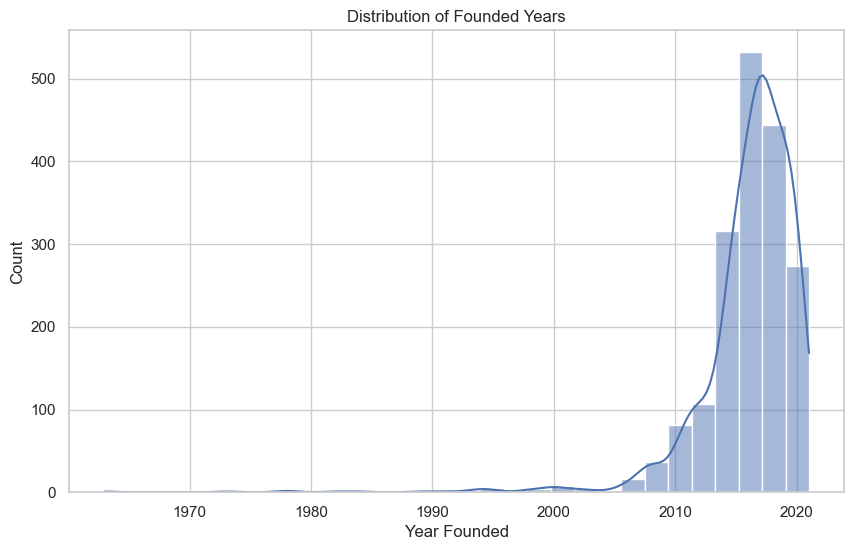

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Founded'], bins=30, kde=True)
plt.title('Distribution of Founded Years')
plt.xlabel('Year Founded')
plt.ylabel('Count')
plt.show()


**Visualize the Distribution of the "Amount" Column**

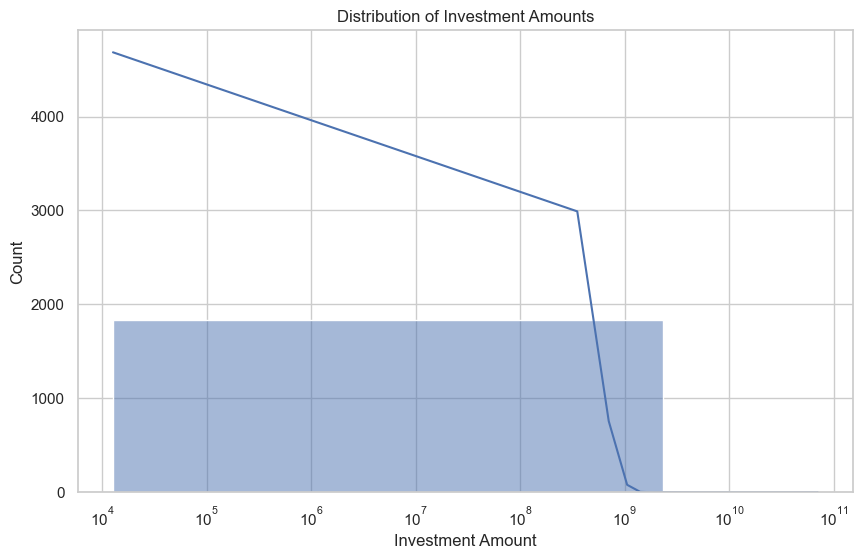

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Amount'], bins=30, kde=True)
plt.title('Distribution of Investment Amounts')
plt.xlabel('Investment Amount')
plt.ylabel('Count')
plt.xscale('log')  # Log scale for better visualization
plt.show()


**Bar plots for Categorical Columns**

**HeadQuarter**

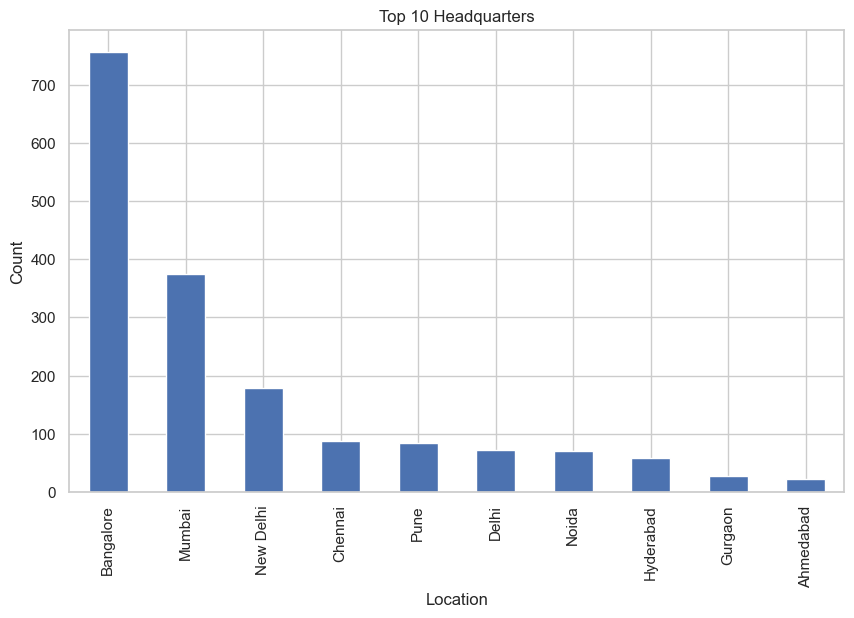

In [37]:
plt.figure(figsize=(10, 6))
merged_data['HeadQuarter'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Headquarters')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

**Sector**

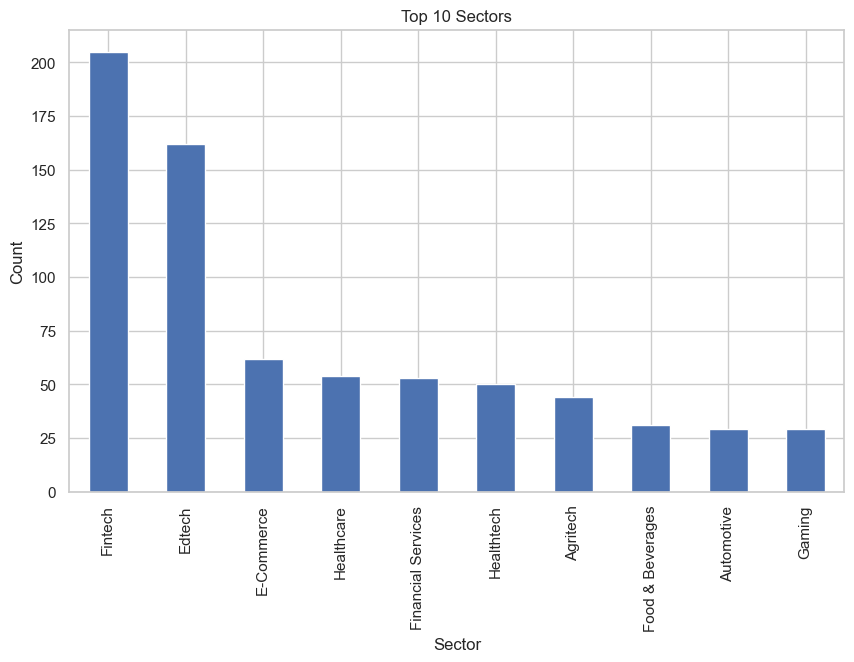

In [38]:
plt.figure(figsize=(10, 6))
merged_data['Sector'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Sectors')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()

**Stages**

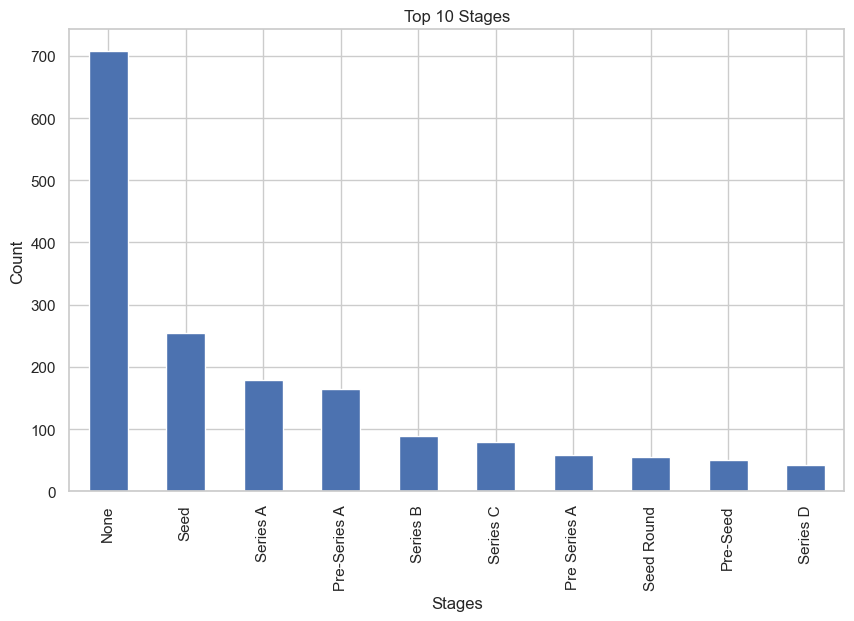

In [39]:
plt.figure(figsize=(10, 6))
merged_data['Stage'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Stages')
plt.xlabel('Stages')
plt.ylabel('Count')
plt.show()

**Investors**

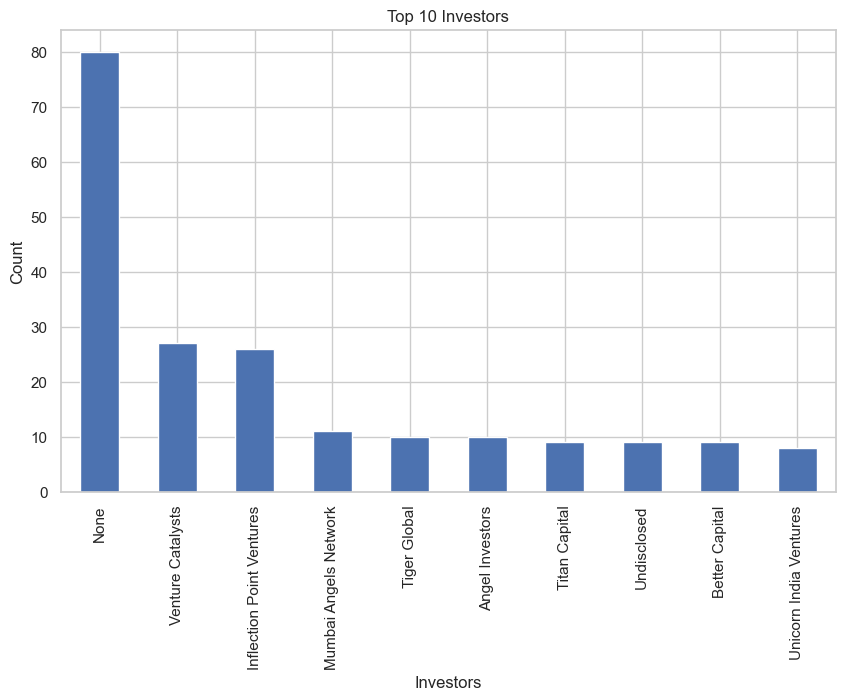

In [40]:
plt.figure(figsize=(10, 6))
merged_data['Investor'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Investors')
plt.xlabel('Investors')
plt.ylabel('Count')
plt.show()

**Line Graph to Explore Relationships**

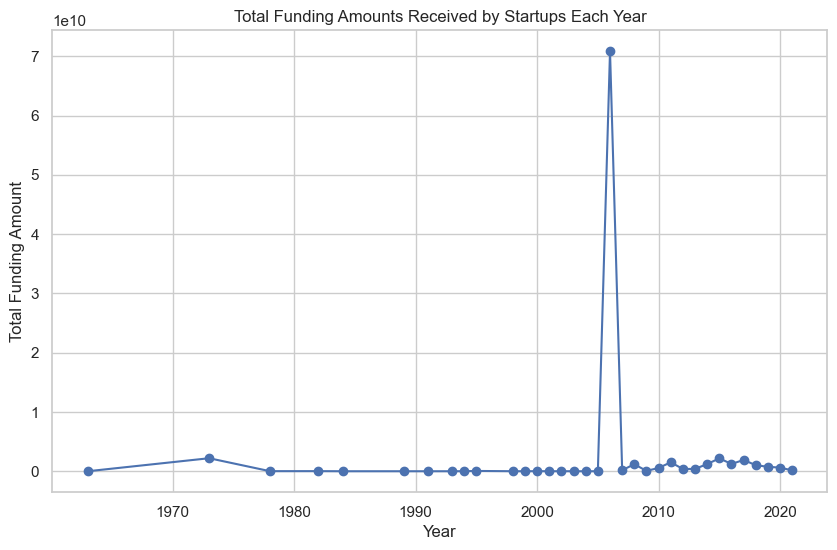

In [41]:

# Extract relevant columns
funding_data = merged_data[['Founded', 'Amount']]

# Group by year and calculate total funding amounts
yearly_funding = funding_data.groupby('Founded').sum().reset_index()

# Plotting the yearly trend of total funding amounts
plt.figure(figsize=(10, 6))
plt.plot(yearly_funding['Founded'], yearly_funding['Amount'], marker='o')
plt.title('Total Funding Amounts Received by Startups Each Year')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.grid(True)
plt.show()



**Further Cleaning of Datasets after EDA**

**Normalize the "HeadQuarter" Column**

In [42]:
# Define a function to extract city names
def extract_city(location):
    if pd.isna(location):
        return location
    return location.split(',')[0].strip()

# Apply the function to the 'HeadQuarter' column
merged_data['HeadQuarter'] = merged_data['HeadQuarter'].apply(extract_city)

merged_data['HeadQuarter'] = merged_data['HeadQuarter'].replace('None', 'Unknown')


# # Verify the changes
# unique_headquarters = merged_data['HeadQuarter'].unique()
# print(f"Unique Headquarters after normalization: {unique_headquarters}")

**Replot the ""Top 10 Headquarters""**

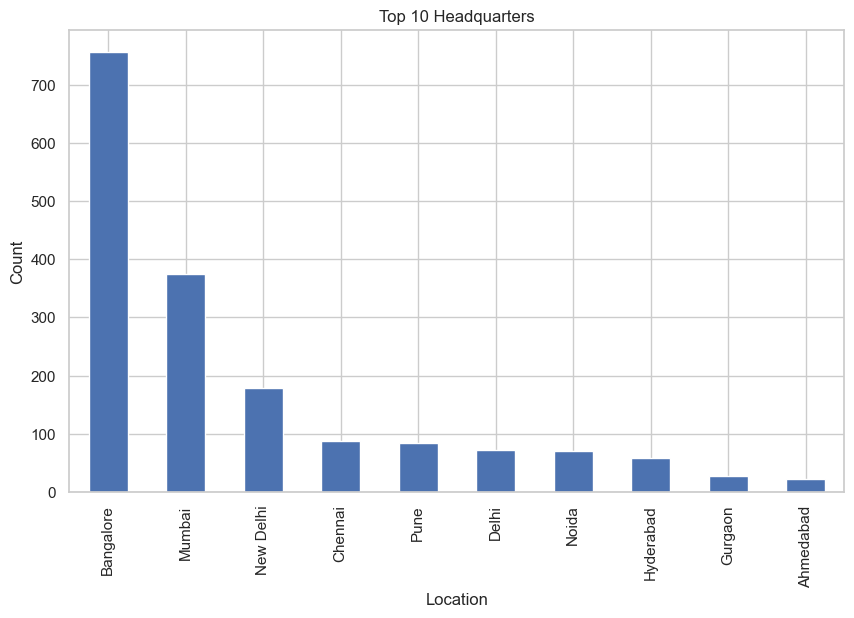

In [43]:
plt.figure(figsize=(10, 6))
merged_data['HeadQuarter'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Headquarters')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

**Rename the "Seed Round" to "Seed" in "Stage" column**

In [44]:
# Replacing 'Seed Round' with 'Seed'
merged_data['Stage'] = merged_data['Stage'].replace('Seed Round', 'Seed')

# Replace NaN and None with 'Unknown' 
merged_data['Stage'] = merged_data['Stage'].replace(['None', 'Nan',  'Venture - Series Unknown'], 'Unknown')


# # Display the updated DataFrame
# merged_data


**Replot the "Top 10 Stages"**

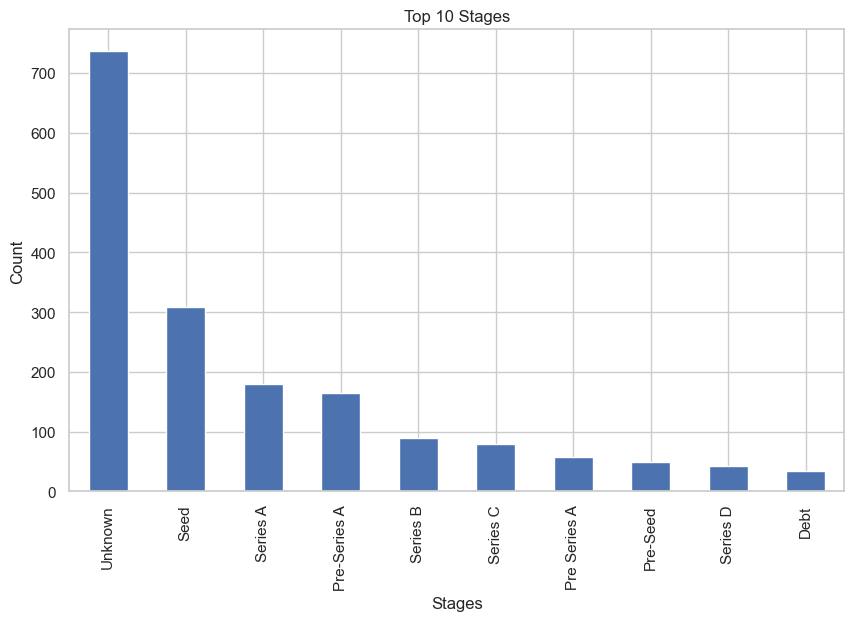

In [45]:
plt.figure(figsize=(10, 6))
merged_data['Stage'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Stages')
plt.xlabel('Stages')
plt.ylabel('Count')
plt.show()

**Rename "Nan" and "None" to "Unknown" in "Investor" Column**

In [46]:
# Replace NaN and None with 'Unknown' 
merged_data['Investor'] = merged_data['Investor'].replace(['None', 'Nan'], 'Unknown')



**Replot the "Top 10 Investors"**

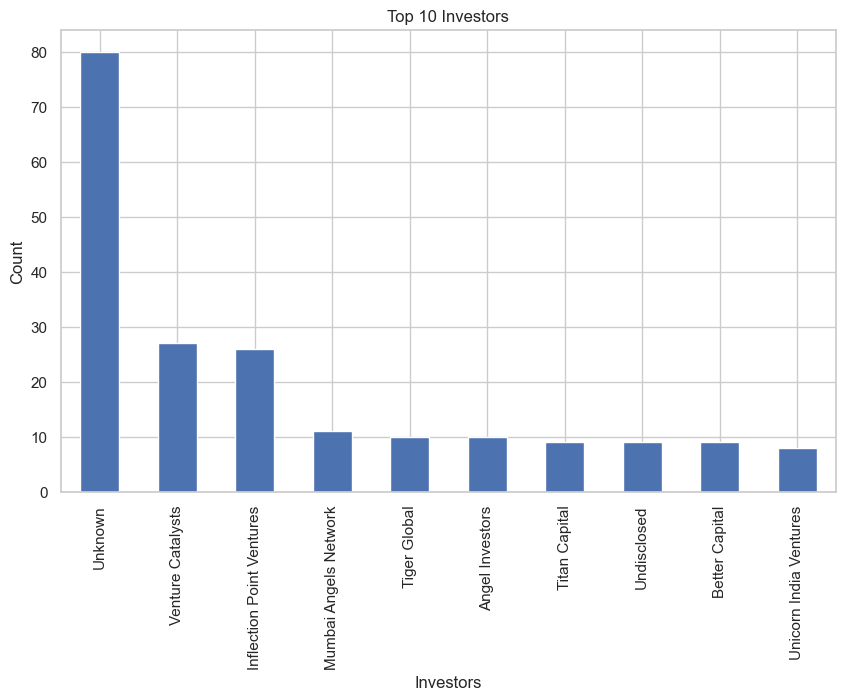

In [47]:
plt.figure(figsize=(10, 6))
merged_data['Investor'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Investors')
plt.xlabel('Investors')
plt.ylabel('Count')
plt.show()

**Outlier Detection**

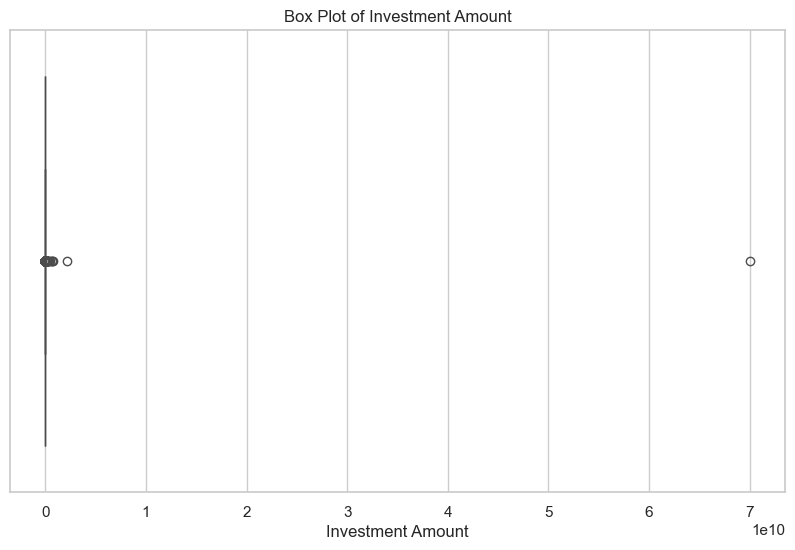

In [48]:
# Box plot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Amount')
plt.title('Box Plot of Investment Amount')
plt.xlabel('Investment Amount')
plt.show()


**Correlation Matrix**

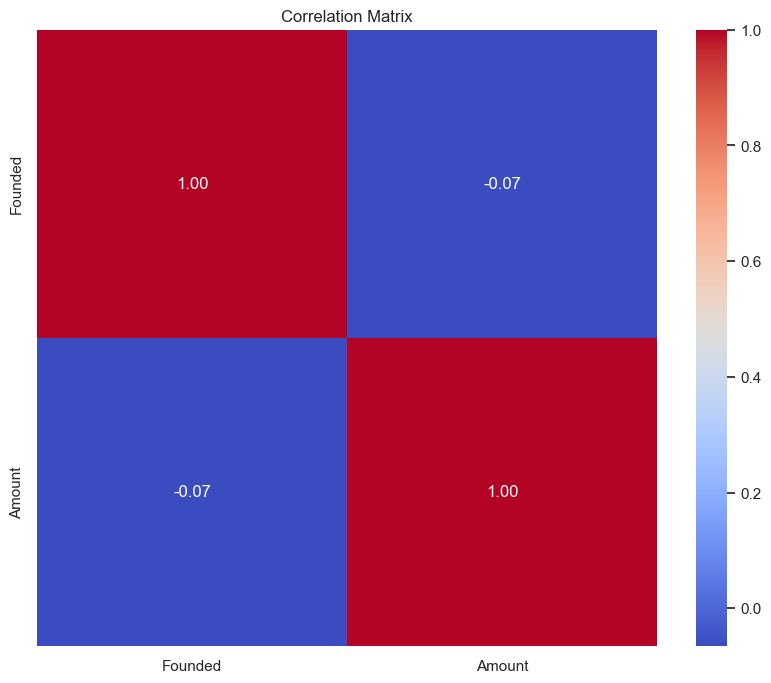

In [49]:
numeric_data = merged_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Key Variables and Metrics Analysis

**1. Yearly Funding Trends**

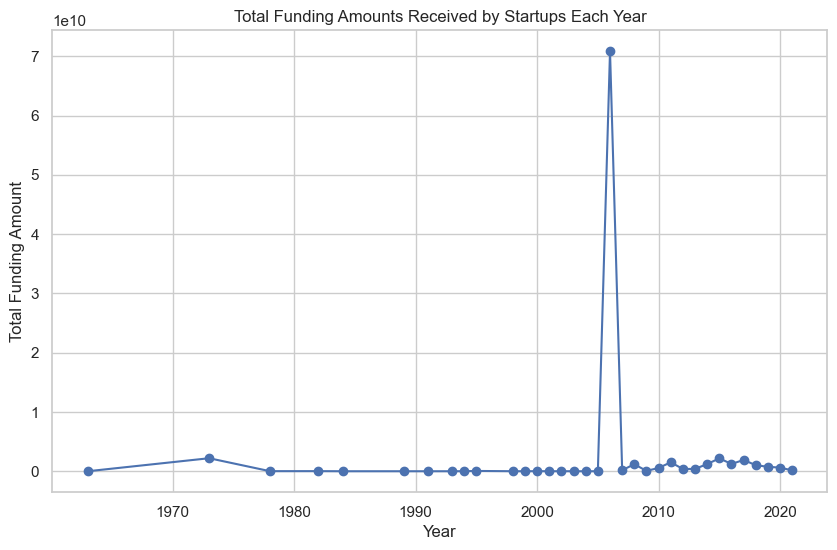

In [50]:
# Extract relevant columns
funding_data = merged_data[['Founded', 'Amount']]

# Group by year and calculate total funding amounts
yearly_funding = funding_data.groupby('Founded').sum().reset_index()


#Plotting the yearly trend of total funding amounts

plt.figure(figsize=(10, 6))
plt.plot(yearly_funding['Founded'], yearly_funding['Amount'], marker='o')
plt.title('Total Funding Amounts Received by Startups Each Year')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.grid(True)
plt.show()


**2. Sector-Specific Funding Analysis**

In [51]:

top_sectors = merged_data['Sector'].value_counts().head(10).index
top_data = merged_data[merged_data['Sector'].isin(top_sectors)]
sector_amounts = top_data.groupby('Sector')['Amount'].sum().sort_values(ascending=False)


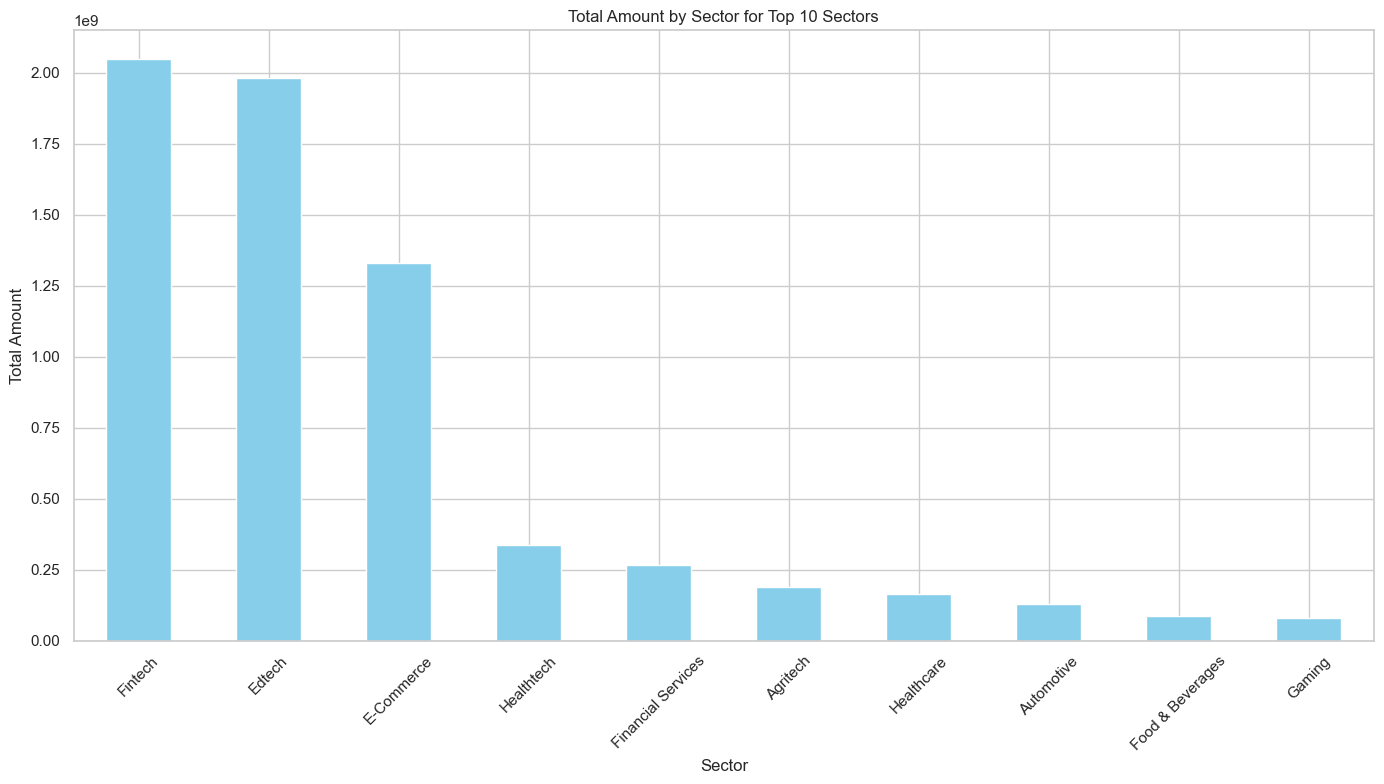

In [52]:
plt.figure(figsize=(14, 8))

# Create the bar plot
sector_amounts.plot(kind='bar', color='skyblue')

plt.title('Total Amount by Sector for Top 10 Sectors')
plt.xlabel('Sector')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3. Funding Stages and Evolution**

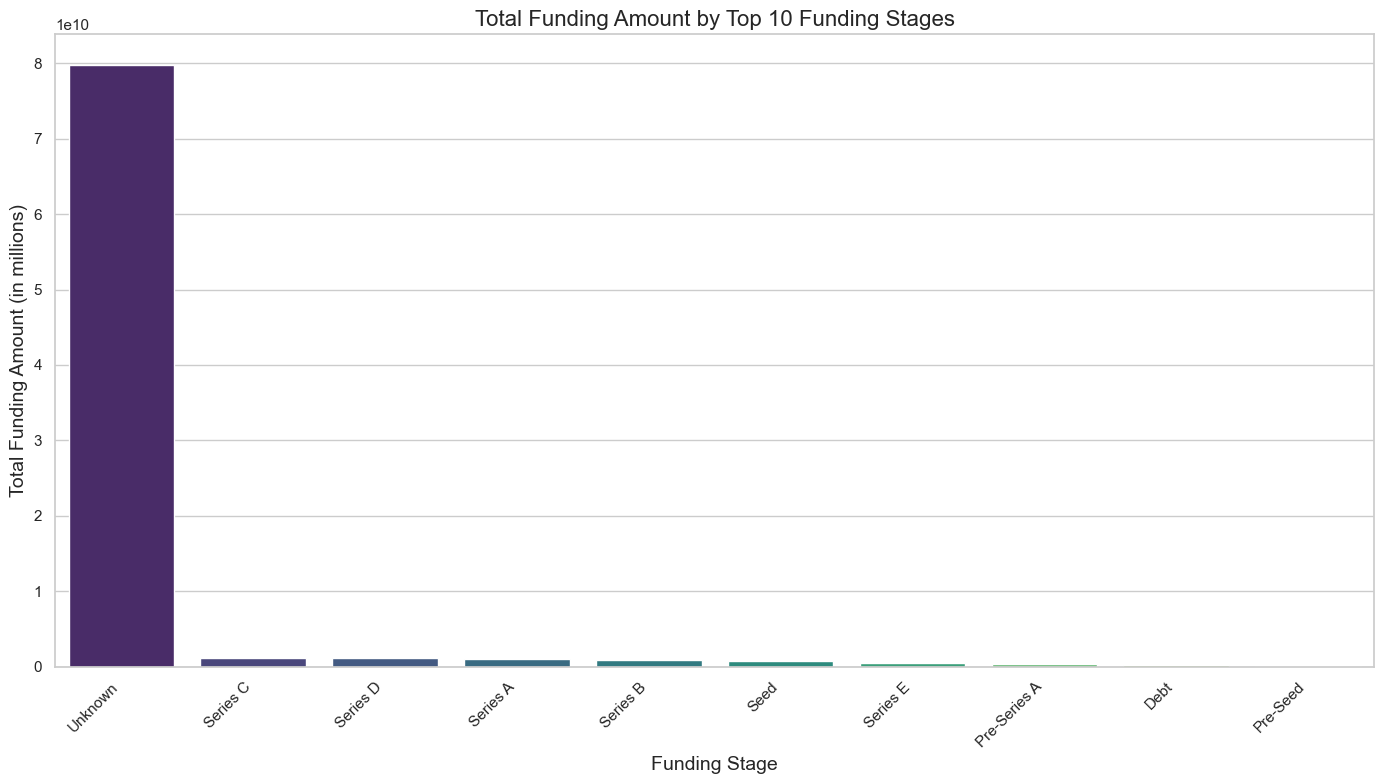

In [53]:
# Aggregate the funding amounts by stage and sort to get the top 10 stages
stage_funding = merged_data.groupby('Stage')['Amount'].sum().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x=stage_funding.index, y=stage_funding.values, palette="viridis")

# Customizing the plot
plt.title('Total Funding Amount by Top 10 Funding Stages', fontsize=16)
plt.xlabel('Funding Stage', fontsize=14)
plt.ylabel('Total Funding Amount (in millions)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

**4. Geographical Distribution of Funding**

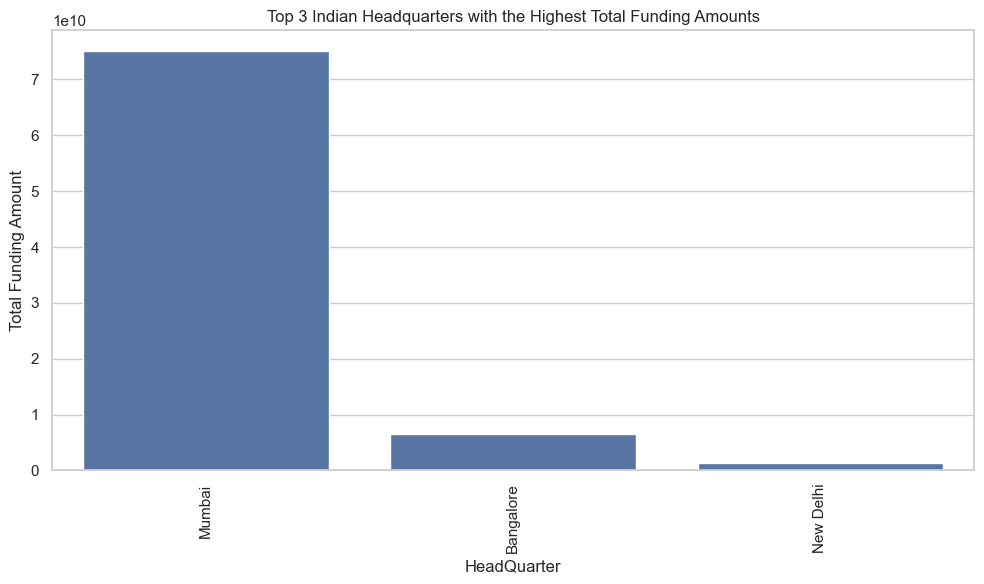

In [54]:


# Step 1: Aggregate the data by summing the funding amounts for each headquarters
agg_data = merged_data.groupby('HeadQuarter')['Amount'].sum().reset_index()

# Step 2: Identify the top 3 headquarters with the highest total funding amounts
top_headquarters = agg_data.nlargest(3, 'Amount')

# Step 3: Plot the results using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='HeadQuarter', y='Amount', data=top_headquarters)
plt.title('Top 3 Indian Headquarters with the Highest Total Funding Amounts')
plt.xticks(rotation=90)
plt.xlabel('HeadQuarter')
plt.ylabel('Total Funding Amount')
plt.tight_layout()
plt.show()


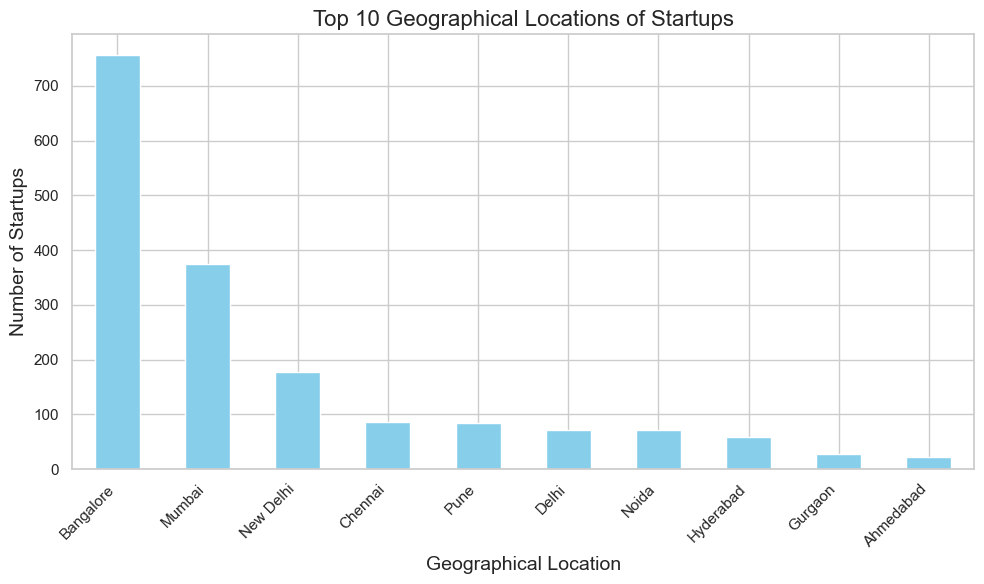

In [55]:
# Aggregate the data by geographical location and get the top 10 locations by startup count
geographical_location = merged_data['HeadQuarter'].value_counts().head(10)

# Plot the data for geographical distribution of startups
plt.figure(figsize=(10, 6))
geographical_location.plot(kind='bar', color='skyblue')

# Customizing the plot
plt.title('Top 10 Geographical Locations of Startups', fontsize=16)
plt.xlabel('Geographical Location', fontsize=14)
plt.ylabel('Number of Startups', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

**Investor Behavior and Preferences**

**Sector**

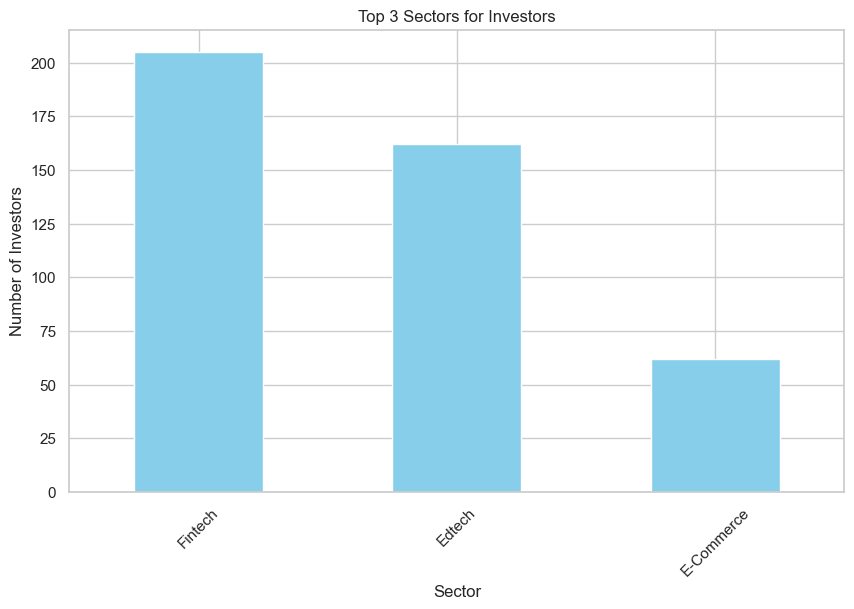

In [56]:
# Group by sector and count the number of investors
sector_investor_counts = merged_data.groupby('Sector')['Investor'].count()

# Sort the sectors by the number of investors in descending order and select the top 3
top_3_sectors = sector_investor_counts.nlargest(3)

# Plotting bar chart
plt.figure(figsize=(10, 6))
top_3_sectors.plot(kind='bar', color='skyblue')
plt.title('Top 3 Sectors for Investors')
plt.xlabel('Sector')
plt.ylabel('Number of Investors')
plt.xticks(rotation=45)
plt.show()


**Stage**

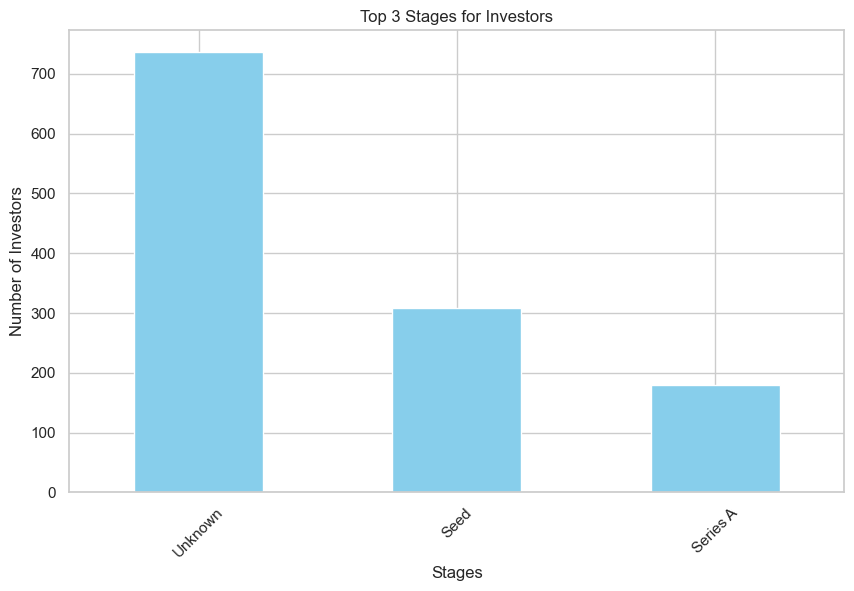

In [57]:
# Group by stage and count the number of investors
stage_investor_counts = merged_data.groupby('Stage')['Investor'].count()

# Sort the stages by the number of investors in descending order and select the top 3
top_3_stages = stage_investor_counts.nlargest(3)

# Plotting bar chart
plt.figure(figsize=(10, 6))
top_3_stages.plot(kind='bar', color='skyblue')
plt.title('Top 3 Stages for Investors')
plt.xlabel('Stages')
plt.ylabel('Number of Investors')
plt.xticks(rotation=45)
plt.show()

**Headquarters**

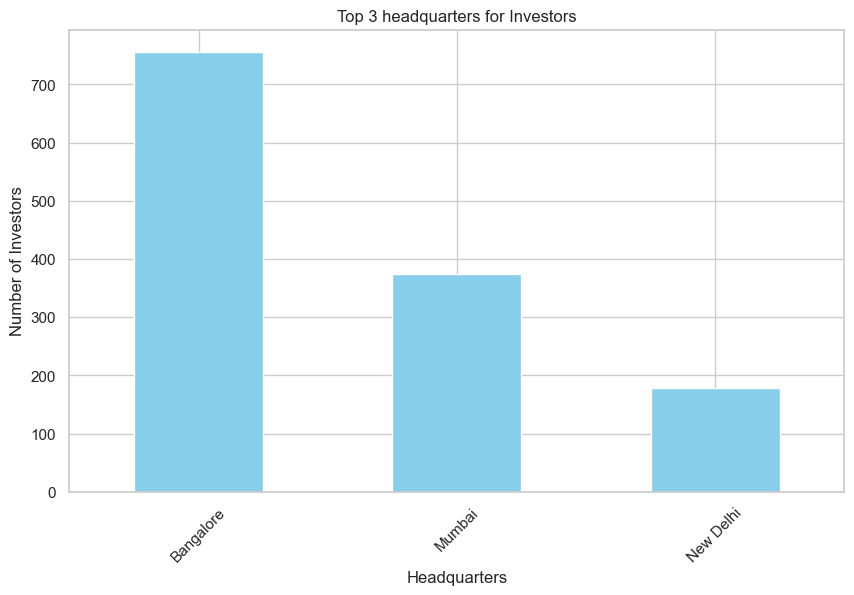

In [58]:

# Group by headquarter and count the number of investors
headquarter_investor_agg = merged_data.groupby('HeadQuarter')['Investor'].count()

# Sort the headquarters by the number of investors in descending order and select the top 3
top_3_headquarters = headquarter_investor_agg.nlargest(3)

# Plotting bar chart
plt.figure(figsize=(10, 6))
top_3_headquarters.plot(kind='bar', color='skyblue')
plt.title('Top 3 headquarters for Investors')
plt.xlabel('Headquarters')
plt.ylabel('Number of Investors')
plt.xticks(rotation=45)
plt.show()

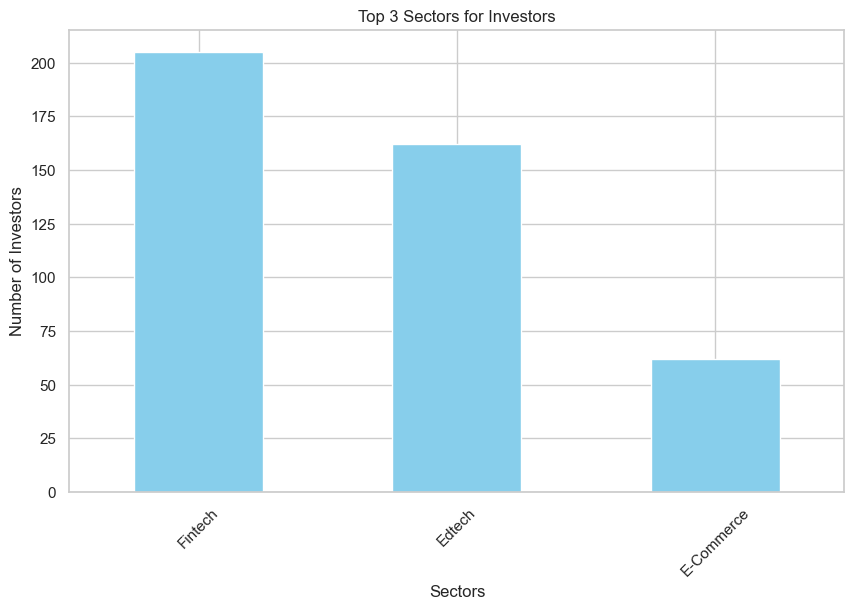

In [59]:

# Group by sector and count the number of investors
sector_investor_counts = merged_data.groupby('Sector')['Investor'].count()

# Sort the stages by the number of investors in descending order and select the top 3
top_3_sectors = sector_investor_counts.nlargest(3)

# Plotting bar chart
plt.figure(figsize=(10, 6))
top_3_sectors.plot(kind='bar', color='skyblue')
plt.title('Top 3 Sectors for Investors')
plt.xlabel('Sectors')
plt.ylabel('Number of Investors')
plt.xticks(rotation=45)
plt.show()

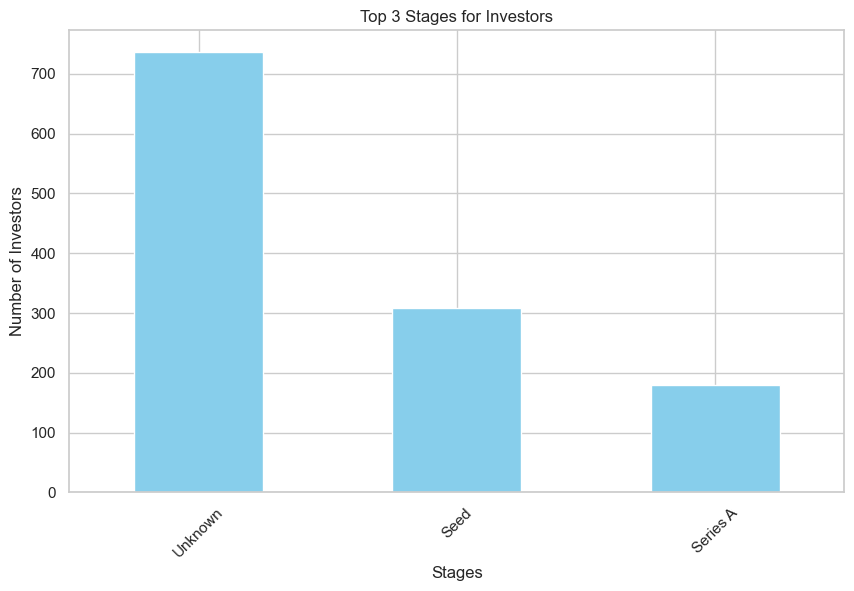

In [62]:
# Group by stage and count the number of investors
stage_investor_counts = merged_data.groupby('Stage')['Investor'].count()

# Sort the stages by the number of investors in descending order and select the top 3
top_3_stages = stage_investor_counts.nlargest(3)

# Plotting bar chart
plt.figure(figsize=(10, 6))
top_3_stages.plot(kind='bar', color='skyblue')
plt.title('Top 3 Stages for Investors')
plt.xlabel('Stages')
plt.ylabel('Number of Investors')
plt.xticks(rotation=45)
plt.show()


**Success Metrics and Revenue Growth**

**Proxies Creation**

Since the 'Amount' and 'Founded' columns are the numeric colummns, we can create proxies to derive some insights and potential metrics on success and revenue growth based on the available information.

In [63]:
# Success Metrics Proxy

# Calculate the minimum and maximum values of the 'Amount' column
min_amount = merged_data['Amount'].min()
max_amount = merged_data['Amount'].max()

# Normalize the 'Amount' column using Min-Max scaling
merged_data['Amount_Normalized'] = (merged_data['Amount'] - min_amount) / (max_amount - min_amount)

# Calculate a simple success score based on funding amount and year founded
merged_data['Success_Score'] = merged_data['Amount_Normalized'] * (2021 - merged_data['Founded'])


In [64]:
# Revenue Growth Proxy

# Group by 'Founded' year and calculate the average normalized funding amount
revenue_growth_proxy = merged_data.groupby('Founded')['Amount_Normalized'].mean()

# Reset index to convert the result back to a DataFrame
revenue_growth_proxy = revenue_growth_proxy.reset_index()

# Rename columns for clarity
revenue_growth_proxy.columns = ['Year_Founded', 'Revenue_Growth_Proxy']



# Display the resulting DataFrame
print(revenue_growth_proxy.head())

   Year_Founded  Revenue_Growth_Proxy
0          1963              0.000040
1          1973              0.031428
2          1978              0.000127
3          1982              0.000300
4          1984              0.000040


In [65]:

# Merge with original data
merged_data_with_growth = merged_data.merge(revenue_growth_proxy, left_on='Founded', right_on='Year_Founded', how='left')


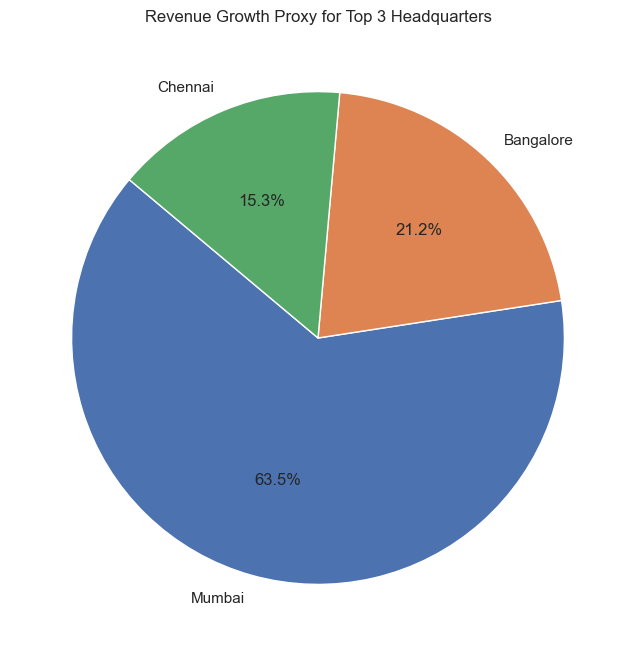

In [66]:
import matplotlib.pyplot as plt

# Get top 3 headquarters based on Revenue Growth Proxy
top_5_hq = merged_data_with_growth.groupby('HeadQuarter').sum().nlargest(3, 'Revenue_Growth_Proxy')

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_hq['Revenue_Growth_Proxy'], labels=top_5_hq.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Growth Proxy for Top 3 Headquarters')
plt.show()


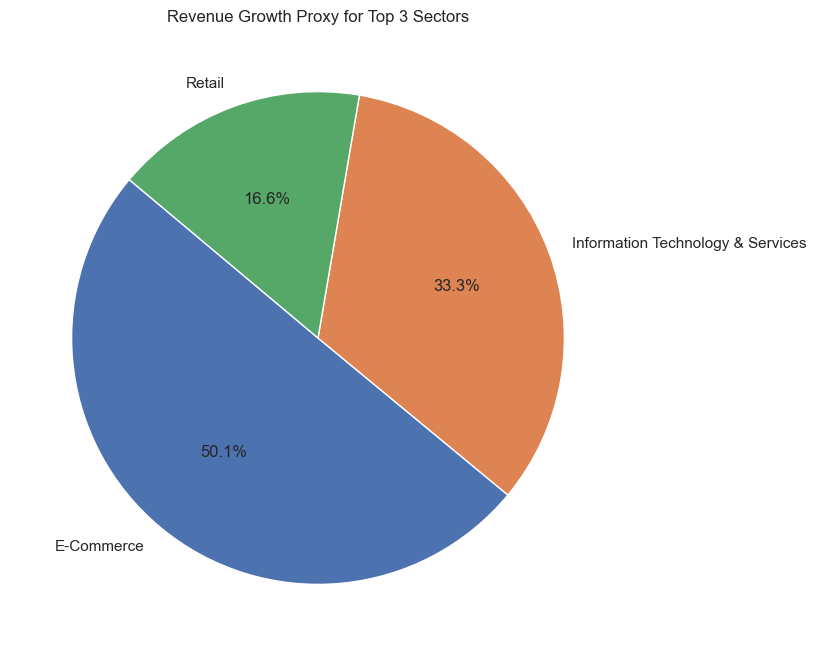

In [67]:
import matplotlib.pyplot as plt

# Get top 5 sectors based on Revenue Growth Proxy
top_3_sc = merged_data_with_growth.groupby('Sector').sum().nlargest(3, 'Revenue_Growth_Proxy')

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_3_sc['Revenue_Growth_Proxy'], labels=top_3_sc.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Growth Proxy for Top 3 Sectors')
plt.show()

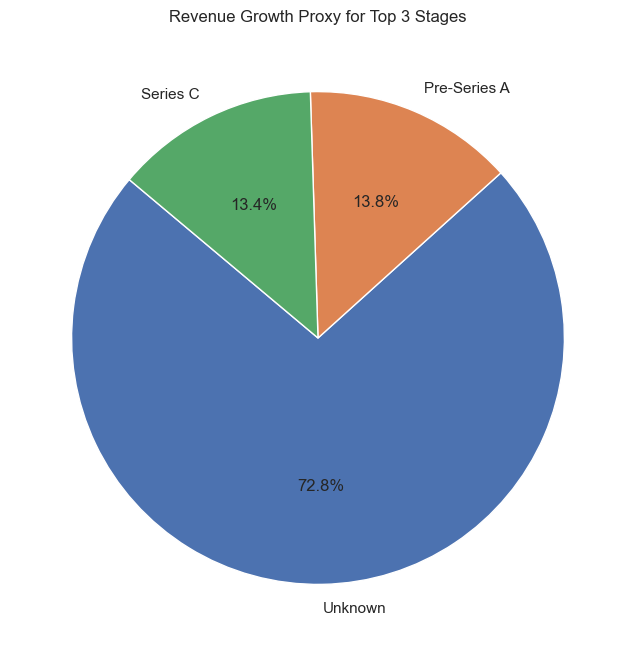

In [68]:
import matplotlib.pyplot as plt

# Get top 3 Stages based on Revenue Growth Proxy
top_3_sg = merged_data_with_growth.groupby('Stage').sum().nlargest(3, 'Revenue_Growth_Proxy')

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_3_sg['Revenue_Growth_Proxy'], labels=top_3_sg.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Growth Proxy for Top 3 Stages')
plt.show()


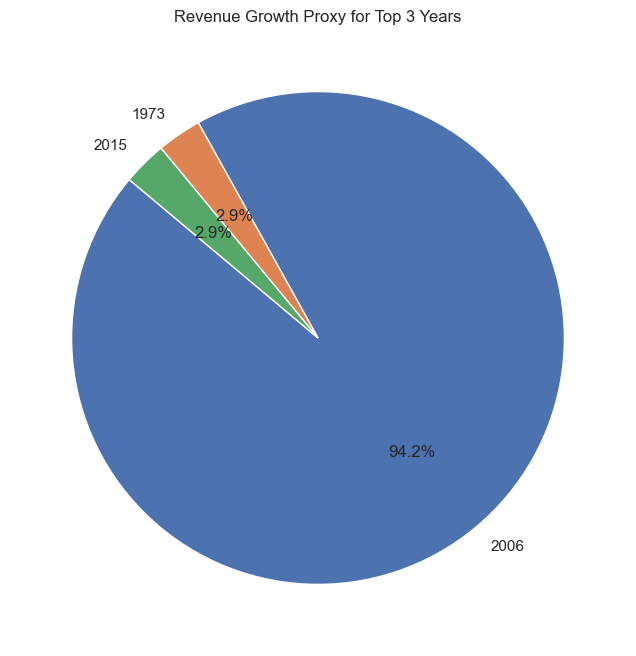

In [69]:
import matplotlib.pyplot as plt

# Get top 3 Year based on Revenue Growth Proxy
top_3_yr = merged_data_with_growth.groupby('Founded').sum().nlargest(3, 'Revenue_Growth_Proxy')

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_3_yr['Revenue_Growth_Proxy'], labels=top_3_yr.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Growth Proxy for Top 3 Years')
plt.show()

**Saving the Dataframe as .csv**

In [70]:
pd.DataFrame(merged_data_with_growth).to_csv('merged_data_with_growth.csv', index=False)

**Conversion of Categorical Data to Numerical Data (Encoding)**

In [71]:
from sklearn.preprocessing import LabelEncoder

# Define the columns to be encoded
categorical_columns = ['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Stage']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Iterate over each column and encode its values
for column in categorical_columns:
    merged_data_with_growth[column] = label_encoder.fit_transform(merged_data_with_growth[column])

# Display the updated data types
print("Data types of each column after label encoding:\n", merged_data_with_growth.dtypes)


Data types of each column after label encoding:
 Company_Brand             int32
Founded                   int32
HeadQuarter               int32
Sector                    int32
What_it_does              int32
Founders                  int32
Investor                  int32
Amount                  float64
Stage                     int32
Amount_Normalized       float64
Success_Score           float64
Year_Founded              int32
Revenue_Growth_Proxy    float64
dtype: object


**Statistical Testing with ANOVA**

**Sector**

In [72]:
from scipy.stats import f_oneway


# Define the columns to be tested
numeric_columns = ['Founded','Amount']

# Perform ANOVA for each numeric column
for column in numeric_columns:
    # Group the data by each categorical column and select the column for the ANOVA test
    grouped_data = merged_data_with_growth.groupby('Sector')[column].apply(list)
    
    # Perform ANOVA test
    statistic, p_value = f_oneway(*grouped_data)
    
    # Print the result
    print(f"ANOVA test for column '{column}':")
    print(f"  F-statistic: {statistic}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  The null hypothesis is rejected (significant result)")
    else:
        print("  The null hypothesis cannot be rejected (non-significant result)")
    print()


ANOVA test for column 'Founded':
  F-statistic: 1.150186268715911
  p-value: 0.03622359035997563
  The null hypothesis is rejected (significant result)

ANOVA test for column 'Amount':
  F-statistic: 0.27239003216521995
  p-value: 0.9999999999999999
  The null hypothesis cannot be rejected (non-significant result)



**HeadQuarter**

In [73]:
# Define the columns to be tested
numeric_columns = ['Founded','Amount']

# Perform ANOVA for each numeric column
for column in numeric_columns:
    # Group the data by each categorical column and select the column for the ANOVA test
    grouped_data = merged_data_with_growth.groupby('HeadQuarter')[column].apply(list)
    
    # Perform ANOVA test
    statistic, p_value = f_oneway(*grouped_data)
    
    # Print the result
    print(f"ANOVA test for column '{column}':")
    print(f"  F-statistic: {statistic}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  The null hypothesis is rejected (significant result)")
    else:
        print("  The null hypothesis cannot be rejected (non-significant result)")
    print()


ANOVA test for column 'Founded':
  F-statistic: 1.895314482009088
  p-value: 0.0009708447179737025
  The null hypothesis is rejected (significant result)

ANOVA test for column 'Amount':
  F-statistic: 0.11017708849610162
  p-value: 0.9999999999968207
  The null hypothesis cannot be rejected (non-significant result)



**Stage**

In [74]:
numeric_columns = ['Founded','Amount']

# Perform ANOVA for each numeric column
for column in numeric_columns:
    # Group the data by each categorical column and select the column for the ANOVA test
    grouped_data = merged_data_with_growth.groupby('Stage')[column].apply(list)
    
    # Perform ANOVA test
    statistic, p_value = f_oneway(*grouped_data)
    
    # Print the result
    print(f"ANOVA test for column '{column}':")
    print(f"  F-statistic: {statistic}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  The null hypothesis is rejected (significant result)")
    else:
        print("  The null hypothesis cannot be rejected (non-significant result)")
    print()

ANOVA test for column 'Founded':
  F-statistic: 5.216576251536461
  p-value: 6.281587850175316e-26
  The null hypothesis is rejected (significant result)

ANOVA test for column 'Amount':
  F-statistic: 0.03704320835596416
  p-value: 0.9999999999999999
  The null hypothesis cannot be rejected (non-significant result)



**Revenue Growth**

In [75]:
# Define the columns to be tested
numeric_columns = ['Founded','Amount']

# Perform ANOVA for each numeric column
for column in numeric_columns:
   
    grouped_data = merged_data_with_growth.groupby('Revenue_Growth_Proxy')[column].apply(list)
    
    # Perform ANOVA test
    statistic, p_value = f_oneway(*grouped_data)
    
    # Print the result
    print(f"ANOVA test for column '{column}':")
    print(f"  F-statistic: {statistic}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  The null hypothesis is rejected (significant result)")
    else:
        print("  The null hypothesis cannot be rejected (non-significant result)")
    print()


ANOVA test for column 'Founded':
  F-statistic: 197.59475957615973
  p-value: 0.0
  The null hypothesis is rejected (significant result)

ANOVA test for column 'Amount':
  F-statistic: 15.574600054992256
  p-value: 1.4907713220503586e-49
  The null hypothesis is rejected (significant result)



**Recommendation and Future Work**

Leveraging the insights from the visualization report, actionable recommendations can be formulated to optimize resource allocation, refine market strategies, and foster collaborations, driving sustainable growth and innovation within the startup ecosystem.

With the visualization report as a foundation, future work can focus on expanding the analysis to delve deeper into specific sectors or regions, exploring predictive analytics for forecasting, and integrating real-time data sources to enhance decision-making capabilities.


**Limitations**


The analysis demonstrated resourcefulness in utilizing proxies to gauge economic trends and success metrics amidst limited available information, showcasing adeptness in navigating data scarcity. However, despite successfully cleaning the datasets, challenges persisted due to inherent limitations in the dataset's completeness and consistency, prompting cautious interpretation of the findings. These experiences underscore the importance of both innovative problem-solving and ongoing efforts to enhance data quality for more reliable analyses in future endeavours.



**Conclusion**

In summary, the analysis uncovered key trends and patterns in startup funding, highlighting the dominance of certain sectors and regions, as well as the impact of external factors like the COVID-19 pandemic on funding dynamics.
These insights provide valuable guidance for stakeholders in navigating the startup ecosystem, identifying growth opportunities, and mitigating risks. Continued exploration and application of data-driven strategies will be crucial for driving innovation and success in the dynamic landscape of startup funding.
As the startup ecosystem continues to evolve, how can organizations adapt and innovate to stay ahead of the curve and capitalize on emerging trends and opportunities?